This notebook is used to plot the uncertainty results using different methods.

In [1]:
from pathlib import Path
import subprocess
from datetime import datetime
from tqdm import tqdm

WORK_DIR = Path().absolute()

In [2]:
import sys

sys.path.append(str(WORK_DIR))

In [3]:
from energyvslatconst.energyvslatconst import energyvslatconst
from energyvslatconst.relaxation_latconst import equilibrate_graphene

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("default")

# Get the uncertainty data

In [4]:
# Load DFT data
dft_data = np.loadtxt("energyvslatconst/dft_data.txt", delimiter=",")

## Dropout

In [5]:
# Equilibration
potential = "DUNN_best_train"
ainit = 2.466  # From materials project for graphite-like structure
a0, e0 = equilibrate_graphene(potential, ainit)
alist = np.linspace(0.93, 1.08, 29) * a0

start = datetime.now()
_, elist_do, errlist_do = energyvslatconst(potential, alist)
end = datetime.now()
print("Evaluation time:", end - start)

100%|██████████████████████████████████████████████████████████████████| 29/29 [00:51<00:00,  1.77s/it]

Evaluation time: 0:00:51.332314


## Bootstrap

In [6]:
bs_data = np.load("bootstrap/results/bootstrap_target_qoi.npz")
energy_ensembles_bs = bs_data["energy_ensembles"]
elist_bs = np.mean(energy_ensembles_bs, axis=0)
errlist_bs = np.std(energy_ensembles_bs, axis=0)

## Random initialization

In [7]:
ri_data = np.load("random_init/results/randinit_target_qoi.npz")
energy_ensembles_ri = ri_data["energy_ensembles"]
elist_ri = np.mean(energy_ensembles_ri, axis=0)
errlist_ri = np.std(energy_ensembles_ri, axis=0)

## FIM

In [8]:
fim_data = np.load("fim/samples_posterior_energyvslatconst.npz")
energy_ensembles_fim = fim_data["energy_ensembles"]
elist_fim = np.mean(energy_ensembles_fim, axis=0)
errlist_fim = np.std(energy_ensembles_fim, axis=0)

# Plot

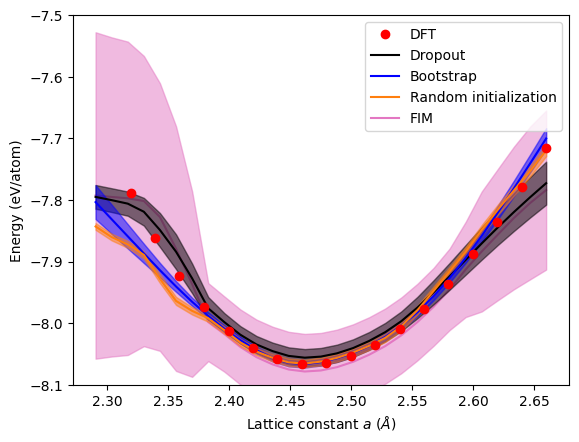

In [9]:
plt.figure()

# DFT data
plt.plot(*(dft_data.T), "ro", label="DFT", zorder=100)

# Dropout
plt.fill_between(
    alist, elist_do - errlist_do, elist_do + errlist_do, alpha=0.5, color="k"
)
plt.plot(alist, elist_do, color="k", label="Dropout")

# Bootstrap
plt.fill_between(
    alist, elist_bs - errlist_bs, elist_bs + errlist_bs, alpha=0.5, color="blue"
)
plt.plot(alist, elist_bs, color="blue", label="Bootstrap")

# Random initialization
plt.fill_between(
    alist, elist_ri - errlist_ri, elist_ri + errlist_ri, alpha=0.5, color="tab:orange"
)
plt.plot(alist, elist_ri, color="tab:orange", label="Random initialization")

# FIM
plt.fill_between(
    alist,
    elist_fim - errlist_fim,
    elist_fim + errlist_fim,
    alpha=0.5,
    color="tab:pink",
    zorder=-100,
)
plt.plot(alist, elist_fim, color="tab:pink", label="FIM", zorder=-100)

plt.ylim(-8.1, -7.5)
plt.xlabel(r"Lattice constant $a$ $(\AA)$")
plt.ylabel("Energy (eV/atom)")
plt.legend()

plt.show()